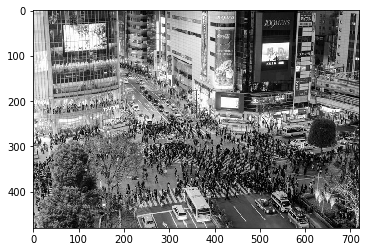

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

def gradiant(img,x,y):

    gx=img[y+1,x]-img[y-1,x]
    gy=img[y,x+1]-img[y,x-1]
    intensity = np.sqrt(np.power(gx,2) + np.power(gy,2))
    if gx==0:
        angle = 90
    else :
        angle = np.degrees(np.arctan(gy/gx))
    return intensity,angle



# Load an color image in grayscale
img = cv2.imread('Shibuya.jpg', 0)
arrayImg = np.asarray(img)  # Convert image as nparray
#add padding
x_pad=arrayImg.shape[0]%8
y_pad=arrayImg.shape[1]%8
img = np.pad(arrayImg, ((0,x_pad),(0,y_pad)), mode="edge") 
plt.imshow(arrayImg,cmap="gray")




In [11]:

def hist_array_counter(arrayImg,x,y,size):
    '''
    inverse call
    '''
    direction_array=np.zeros(8)
    for i in range (x,x+size):
        for j in range(y,y+size):
            direction=int(gradiant(arrayImg,i,j)[1])
            direction_array[direction%8]=1+direction_array[direction%8]
    return direction_array

arrays=[]
for i in range (0,img.shape[0]-8,8):
    for j in range (0,img.shape[1]-8,8):
        array = hist_array_counter(img,j,i,8)
        arrays.append(array)

cols=["0-45","45-90","90-135","135-180","180-225","225-270","270-315","315-360"]
df= pd.DataFrame(arrays,columns=cols)
df.to_csv("Task 2 histograms.csv")
    